<a href="https://colab.research.google.com/github/danielyangdev/CAIS-Winter-Project/blob/main/CAIS%2B%2B_Winter_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import regularizers
import matplotlib.pyplot as plt

In [51]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Other/CAIS++/S24_Projects/test

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Other/CAIS++/S24_Projects/test


In [52]:
base_dir = '/content/drive/My Drive/Other/CAIS++/S24_Projects/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [53]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

In [54]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
)

(train_images, train_labels) = next(train_generator)
(test_images, test_labels) = next(test_generator)
type(train_images[0])

Found 4764 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


numpy.ndarray

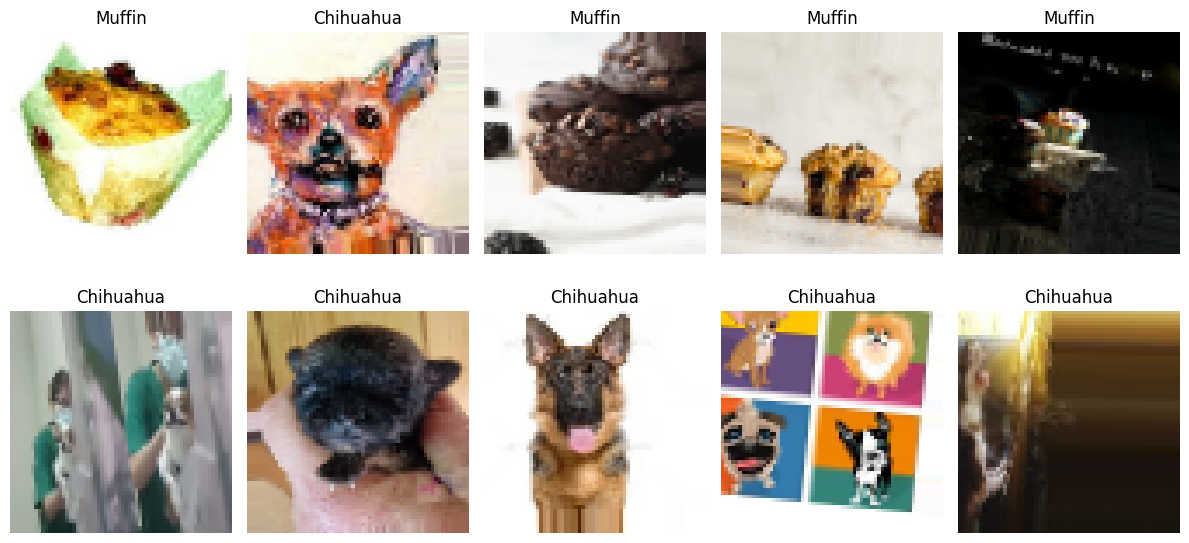

In [55]:
label_names = {
    0: "Chihuahua",
    1: "Muffin"
}

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(label_names[train_labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [56]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
history = model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels),
)

Epoch 1/5
2/2 [==============================] - 15s 13s/step - loss: 0.7314 - accuracy: 0.5625 - val_loss: 0.5863 - val_accuracy: 0.6719
Epoch 2/5
2/2 [==============================] - 9s 7s/step - loss: 0.7408 - accuracy: 0.6406 - val_loss: 0.4816 - val_accuracy: 0.7656
Epoch 3/5
2/2 [==============================] - 10s 7s/step - loss: 0.4094 - accuracy: 0.8125 - val_loss: 0.6089 - val_accuracy: 0.7344
Epoch 4/5
2/2 [==============================] - 14s 12s/step - loss: 0.3335 - accuracy: 0.8438 - val_loss: 0.4070 - val_accuracy: 0.7656
Epoch 5/5
2/2 [==============================] - 9s 7s/step - loss: 0.2606 - accuracy: 0.8906 - val_loss: 0.3723 - val_accuracy: 0.8438
